<a href="https://colab.research.google.com/github/manoelpajr/projetos_data_science/blob/master/projeto_DOLFUT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploração Inicial dos dados referentes ao Dólar Futuro (DOLFUT)**

A [B3](http://www.b3.com.br/pt_br/) - Brasil, Bolsa, Balcão - situada na cidade de São Paulo, é uma das principais bolsa de valores do mundo. Nela são negociados contratos de ativos de diversas natureza, como, ações de empresas, *commodities*, juros, câmbio, dentre outros. 

Nesse rol de ativos negociados encontra-se o *Dólar Futuro*, indentificado pela sigla - **DOLFUT**. Esse ativo tem uma elevada liquidez e são negociados diariamente centenas de milhares de contratos.

Muitos utilizam esse ativo como forma de especulação, principalmente os *traders* que operam na modalidade *Day trade*. Porém, pode ser utilizado como forma de proteção cambial, conhecido como *Hedge*, onde, principalmente, empresas exportadoras e importadoras definem um determinado valor que querem pagar no dólar futuramente. 

Esse ativo tem vencimento mensal, por isso, ao longo do ano, as letras finais de identificação vão mudando. Observem a tabela abaixo.

<img alt="Tabela_Dolar_Futuro" width="50%" src="https://www.operefuturos.com.br/wp-content/uploads/2019/03/Cod-d%C3%B3lar.png">

Sobre o *Dataset* utilizado nesse trabalho ele foi retirado da plataforma [ProfitChart Pro](https://www.nelogica.com.br/produtos/profit-pro) e contém um conjunto de entradas e variáveis que serão explorados e analisados nesse trabalho.




## **Importação das bibliotecas**

Para a exploração e analise dos dados utilizaremos a biblioteca *Pandas*. A seguir faremos a importação da mesma.

In [2]:
#importação das bibliotecas

import pandas as pd

##**Importação do *dataframe***

Como dito anteriormente o banco de dados foi retirado de uma plataforma para pessoas que operam na bolsa de valores chamada - **Profitchart Pro**. Nela, é possível baixar os dados em formato `csv`.

Os dados está disponível no repositório do *Github* e pode ser acessado através desse [link](https://raw.githubusercontent.com/manoelpajr/datas_projects_datascience/master/dolar_futuro_diario.csv).

Obs.: Nosso *dataset* tem como delimitador o `;` por isso será necessário, no momento da importação, informar qual será o delimitador das colunas.

In [3]:
#realizando a importação o dataframe

df = pd.read_csv("https://raw.githubusercontent.com/manoelpajr/datas_projects_datascience/master/dolar_futuro_diario.csv", sep=";")

##**Verificar o tipo e a dimensão do nosso banco de dados**

Após a importação dos dados é importante saber o tipo e a dimensão do nosso banco de dados. Para descobrir essas informações utilizaremos as funções `type` e `shape`.

In [4]:
# ver o tipo do banco de dados
type(df)

pandas.core.frame.DataFrame

In [5]:
# verificar o tipo das colunas
type(df['Fechamento'])

pandas.core.series.Series

In [6]:
#verificar as dimensões do banco de dados
df.shape

(494, 7)

Verificamos que o nosso banco de dados é um `DataFrame`, que as nossas colunas são `Series` e a dimensão é de 7 colunas e 494 linhas. 

##**Iniciando a observação dos dados**

Após levantarmos algumas informações sobre o nosso banco de dados, torna-se importante visualizarmos os dados e como eles estão sendo apresentados em nosso *dataset*. Para termos uma noção inicial, iremos utilizar as funções `head`e `tail`. Essas funções nos permite visualizar as cinco primeiras e últimas linhas do banco de dados, respectivamente.

Além disso, é importante verificarmos os nomes das colunas - `columns`, o tipo da variáve de cada coluna - `dtypes` e a existência de valores nulos - `info`. Observem os passos a seguir:

In [7]:
#verificando as cinco primeira linhas
df.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,Quantidade
0,01/07/2020,"5.472,50","5.482,00","5.305,50","5.324,50","75482557375,00",281.190
1,30/06/2020,"5.430,00","5.513,50","5.410,50","5.463,00","89629807125,00",327.865
2,29/06/2020,"5.457,98","5.470,98","5.388,01","5.407,00","73502699375,00",270.445
3,26/06/2020,"5.379,51","5.491,47","5.366,52","5.482,97","91547204625,00",335.750
4,25/06/2020,"5.380,01","5.386,01","5.266,05","5.354,52","92693603500,00",347.475


In [8]:
#verificando as cinco últimas linhas
df.tail()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,Quantidade
489,06/07/2018,"4.230,47","4.241,17","4.141,65","4.145,39","57975513125,00",295.260
490,05/07/2018,"4.181,24","4.229,94","4.170,01","4.219,77","55301593750,00",281.415
491,04/07/2018,"4.184,99","4.205,86","4.170,01","4.198,90","23385931750,00",119.425
492,03/07/2018,"4.168,40","4.187,13","4.156,09","4.182,85","44688002250,00",229.095
493,02/07/2018,"4.178,57","4.206,39","4.165,19","4.200,51","51178045625,00",261.370


Temos uma tabela então com sete colunas diferentes, com diferentes tipos de variáveis.  

In [9]:
#verificando o nome das colunas
df.columns

Index(['Data', 'Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Volume',
       'Quantidade'],
      dtype='object')

In [10]:
#verificando o tipo das variáveis de cada coluna
df.dtypes

Data           object
Abertura       object
Maximo         object
Minimo         object
Fechamento     object
Volume         object
Quantidade    float64
dtype: object

In [11]:
#verificando o tipo das variáveis e quantidade de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        494 non-null    object 
 1   Abertura    494 non-null    object 
 2   Maximo      494 non-null    object 
 3   Minimo      494 non-null    object 
 4   Fechamento  494 non-null    object 
 5   Volume      494 non-null    object 
 6   Quantidade  494 non-null    float64
dtypes: float64(1), object(6)
memory usage: 27.1+ KB


Aqui encontramos algumas informações muito importantes para o andamento do trabalho. Observem que não existem valores nulos (`non-null`) em nenhuma das colunas.

Outro ponto imporante é observar que as varíaveis, com exceção da `Quantidade`, são do tipo `Object`. No entanto, possuímos uma variável `Data` e as outras são numéricas; logo, será necessário realizar a conversão dessas variáveis para do tipo `Datetime` para a coluna Data e `Float` para as colunas com valores numéricos. 

## **Conversão dos dados**

A partir da observação dos tipos das variáveis nota-se que alguns dados estão em um formato que dificultará a exploração e analise. Por exemplo, a data é um `Object` e deveria ser do tipo `Date`; a abertura, a máxima, a mínima e o fechamento também estão aparecendo como `Object` e deveriam ser do tipo `float`. 

Faremos essas alterações utilizando a função `to_datetime` para data e o método `apply` para os dados numéricos.

### Transformando a coluna Data

In [12]:
#como está apresentado nossa coluna data
df.Data

0      01/07/2020
1      30/06/2020
2      29/06/2020
3      26/06/2020
4      25/06/2020
          ...    
489    06/07/2018
490    05/07/2018
491    04/07/2018
492    03/07/2018
493    02/07/2018
Name: Data, Length: 494, dtype: object

In [13]:
#realizando a transformação da nossa coluna data para o formato datetime
df.Data = pd.to_datetime(df.Data, format="%d/%m/%Y")

In [14]:
#após a alteração dos valores veremos como ficou a nossa coluna
df.Data

0     2020-07-01
1     2020-06-30
2     2020-06-29
3     2020-06-26
4     2020-06-25
         ...    
489   2018-07-06
490   2018-07-05
491   2018-07-04
492   2018-07-03
493   2018-07-02
Name: Data, Length: 494, dtype: datetime64[ns]

In [15]:
#transformando a coluna de data em nosso index
df.set_index('Data', inplace=True)

### Transformando as colunas numéricas

As colunas com valores numéricos teve a necessidade de um conjunto maior de transformação por conta da forma como os valores estavam sendo representados. Se observarmos a visualização das primeiras linhas veremos dados com valores assim: '5.230,00'. 

Para realizar a transformação para `float64` será necessário então transformar esses valores para o padrão americano de numeração e depois transformá-lo no formato desejado.

Para isso, utilizaremos os métodos `apply` e `replace`, e a função `lambda`.

In [16]:
#mudando o formato da coluna Abertura
df['Abertura'] = df['Abertura'].apply(lambda x: float(x.replace('.','').replace(',','.')))

In [17]:
# mudando o formato da coluna Maximo
df['Maximo'] = df['Maximo'].apply(lambda x: float(x.replace('.','').replace(',','.')))

In [18]:
#mudando o formato da coluna Minimo
df['Minimo'] = df['Minimo'].apply(lambda x: float(x.replace('.','').replace(',','.')))

In [19]:
#mudando o formato da coluna Fechamento
df['Fechamento'] = df['Fechamento'].apply(lambda x: float(x.replace('.','').replace(',','.')))

In [20]:
#mudando o formato da coluna Volume
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(',','.')))

In [21]:
# agora vamos ver como ficou os nossos dados na tabela
df.head()

,Abertura,Maximo,Minimo,Fechamento,Volume,Quantidade
Data,,,,,,
2020-07-01,5472.50,5482.00,5305.50,5324.50,7.548256e+10,281.190
2020-06-30,5430.00,5513.50,5410.50,5463.00,8.962981e+10,327.865
2020-06-29,5457.98,5470.98,5388.01,5407.00,7.350270e+10,270.445
2020-06-26,5379.51,5491.47,5366.52,5482.97,9.154720e+10,335.750
2020-06-25,5380.01,5386.01,5266.05,5354.52,9.269360e+10,347.475


In [22]:
#confirmação das alterações para os tipos
df.dtypes

Abertura      float64
Maximo        float64
Minimo        float64
Fechamento    float64
Volume        float64
Quantidade    float64
dtype: object

Bingo! Conseguimos então modificar os valores para os formatos corretos. Isso possibilita que possamos explorar e analisar esses dados, a partir de agora, de maneira mais acertiva. 

## Resumo estatístico das nossas variáveis numéricas

Uma das maneiras mais simples de se iniciar uma análise exploratória das variáveis numéricas é utilizado o método `describe`. Imediatamente você obtém um resumo contendo algumas das principais informações estatísticas relevantes:

   *   **count** - quantidade de entradas válidas
   *   **mean** - média dos valores
   *   **std** - desvio padrão
   *   **min** - menor valor da coluna
   *   **25%** - percentil 25
   *   **50%** -percential 50 (e mediana)
   *   **75%** - percentil 75
   *   **max** - maior valor da coluna

É possível identificar de cara colunas com valores ausentes e possíveis *outliers*.

Para sabermos mais informações sobre os valores encontrados no nosso banco de dados veremos um resumo estatístico das nossas variáveis numéricas usando o método `describe`.

In [23]:
# ver o resumo estatístico das variáveis
df[['Abertura','Maximo', 'Minimo', 'Fechamento', 'Volume', 'Quantidade']].describe()

,Abertura,Maximo,Minimo,Fechamento,Volume,Quantidade
count,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000
mean,4297.933462,4330.364757,4268.200769,4300.094069,7.671477e+10,367.728917
std,478.479249,490.848797,466.079956,479.409671,2.073024e+10,91.180761
min,3784.800000,3857.410000,3781.100000,3818.710000,2.338593e+10,118.285000
25%,4007.477500,4029.550000,3988.027500,4012.575000,6.329430e+10,307.083750
50%,4129.810000,4161.600000,4102.205000,4135.320000,7.407728e+10,359.432500
75%,4298.412500,4324.127500,4270.742500,4301.145000,8.769818e+10,412.435000
max,5936.770000,5986.340000,5832.610000,5903.720000,1.618007e+11,754.215000


###**Média**

Se quisermos obter a média de alguma variável numérica, basta executar o método `mean()`. OU seja, basta selecionar a columa e executar a função.

In [24]:
#ver a média da coluna Abertura
df.Abertura.mean()

4297.933461538469

###**Mediana**

Mediana é o valor que separa a metade maior e a metade menor de um conjunto de dados. Por exemplo, considere o conjunto `meus_dados = [1,1,2,4,9]`. O valor que está no meio é o número 2. Não confunda com a média, que é a soma de todos os valores dividido pela sua quantidade.

In [25]:
#calcular a mediana da Abertura
df.Abertura.median()

4129.81

###**Desvio Padrão**

Desvio padrão é uma medida de dispersão em torno da média populacional de uma variável.

$$SD = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \overline{x}) ^ 2}$$

Falando simplicadamente, um número alto do desvio padrão indica que os dados estão bem espalhados em relação a sua média. Já um desvio padrão baixo mostra que os valores estão mais agrupado, mais "juntos".

Na figura abaixo temos um exemplo de valores altos e baixos para o desvio padrão. Em vermelho os dados estão mais próximos à sua média e em azul estão bem mais espalhados.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Comparison_standard_deviations.svg/400px-Comparison_standard_deviations.svg.png">

Para calcular o desvio padrão de qualquer coluna, basta executar o método `std()` para a variável.

In [26]:
#calculando o desvio padrão para a coluna Abertura
df.Abertura.std()

478.47924895600516

###**Valores máximo e mínimo**

Para calcular o valor máximo, basta executar  o método `max()`, enquanto para o valor mínimo basta executar `min()`.

In [27]:
#valor maximo
df.Abertura.max()

5936.77

In [28]:
#valor minimo
df.Abertura.min()

3784.8

###**Quartis**

Os quartis são valores dados a partir do conjunto de observaçoes ordenados em ordem crescente, que dividem a distruibuição em quatro partes iguais. O primeiro Quartil (Q1), é o número que deixa 25% das observações abaixo e 75% acima, enquanto o terceiro Quartil (Q3), deixa 75% das observações abaixo e 25% acima. Já o segundo Quartil (Q2), é a mediana, deixa 50% das observações abaixo e 50% das observações acima. 

Uma medida de dispersão alternativa ao desvio padrão é a distância ou intervalo interquartil, definida como a diferença entre o terceiro e o primeiro quartil, isto é,

*inter_interquartil = Q3 - Q1*

Foi desenvolvido no âmbito da estatística a fim de avaliar o grau de espalhamento dos dados (dispersão) e é uma excelente forma de acharmos valores *outliers*.

Para visualizarmos os quartis iremos utilizar o método `quantile(q=0.25)` para o primeiro quartil. Para o Q2 utiliza-se `q=0.5` e para o Q3 `q=0.75`.

In [29]:
#calculando os quartis para a coluna abertura
#Q1
df.Abertura.quantile(q=0.25)

4007.4775

In [30]:
#Q2
df.Abertura.quantile(q=0.5)

4129.81

In [31]:
#Q3 
df.Abertura.quantile(q=0.75)

4298.412499999999

In [32]:
#Intervalo interquartil
inter_interquartil = df.Abertura.quantile(q=0.75) - df.Abertura.quantile(q=0.25)
inter_interquartil

290.9349999999995

##**Visualização dos dados**

A partir de agora iremos visualizar nossos dados em alguns tipos de gráficos por meio da biblioteca Pandas.

###**Gráfico de Linhas**

Vamos supor que você quisesse visualizar como formas as máximas dos valores para do Dólar Futuro.

Para isso vamos selecionar a coluna "Maximo" e em seguida executar o método `plot()`.

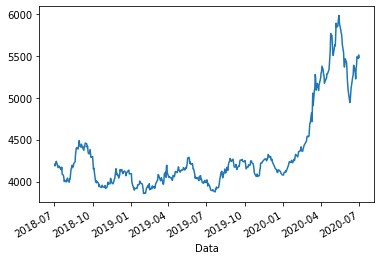

In [33]:
#visualizar o gráfico de linhas para a coluna Maximo
df.Maximo.plot();

###**Histograma**

Quando se quer ter uma noção de quantes vezes uma determinada informação aparece no conjunto de dados, plotar o histograma pode ser de grande valor.

Histogramas são das umas principais ferramentas estatística para extrair informações sobre frequencia e distribuição dos nossos dados. Ele é conceitualmente bem simples.

Vamos plotar o histograma do volume movimentado para o Dólar Futuro - DOLFUT.

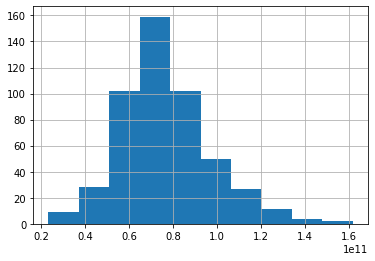

In [34]:
#plotar o histograma do volume
df.Volume.hist();

###**Gráfico de dispersão**

O gráfico de dispersão é um gráfico ideal para ver a correlação entre duas variáveis quaisquer. Serve não apenas para mostrar quanto uma variável é afetada por outra, mas também para plotar coordenadas geográficas para tem um *awareness*.

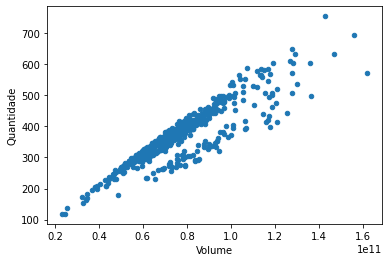

In [35]:
#visualizando o gráfico de dispersão para as variáveis volume e quantidade
df.plot.scatter('Volume', 'Quantidade');

###**Boxplot**

Boxplot é um dos tipos de gráfico que conseguem fornecer o maior número de informações estatísticas de uma vez só.

<img alt="Boxplot" width="50%" src="https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/boxplot-1-1024x664.png?resize=1024%2C664">

É possível ter em uma imagem os valores máximos, mínimos, quartis e mediana. *Outliers* também são representados como pontos acima do valor máximo ou abaixo do valor mínimo.

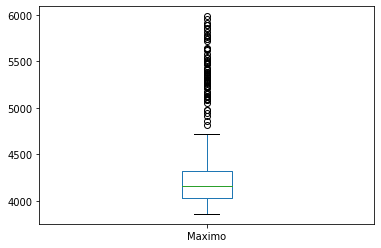

In [36]:
#plotar boxplot para os valores máximos do dolar futuro
df.Maximo.plot(kind='box');

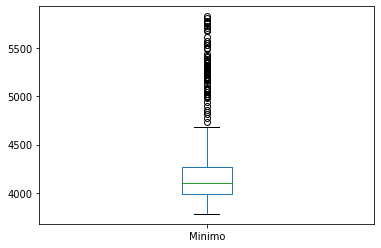

In [37]:
#plotar boxplot para os valores mínimo do dólar futuro
df.Minimo.plot(kind='box');